In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
celebs = ['Akshay_Kumar', 'Amitabh_Bachchan', 'Amrita_Rao', 'Bhumi_Pednekar', 
          'Deepika_Padukone', 'Hrithik_Roshan', 'Irrfan_Khan', 'Juhi_Chawla',
          'Prachi_Desai', 'Sushant_Singh_Rajput']

In [3]:
os.chdir('data/celeb_faces_dataset')
if os.path.isdir('train/Akshay_Kumar/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for c in celebs:
        shutil.move(f'{c}', 'train')
        os.mkdir(f'valid/{c}')
        os.mkdir(f'test/{c}')

        valid_samples = random.sample(os.listdir(f'train/{c}'), 30)
        for i in valid_samples:
            shutil.move(f'train/{c}/{i}', f'valid/{c}')

        test_samples = random.sample(os.listdir(f'train/{c}'), 5)
        for j in test_samples:
            shutil.move(f'train/{c}/{j}', f'test/{c}')
os.chdir('../..')

In [4]:
train_path = 'data/celeb_faces_dataset/train'
valid_path = 'data/celeb_faces_dataset/valid'
test_path = 'data/celeb_faces_dataset/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
                .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
                .flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
               .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 509 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [6]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [8]:
x = mobile.layers[-1].output

In [9]:
output = Dense(units=10, activation='softmax')(x)

In [10]:
model = Model(inputs=mobile.input, outputs=output)

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [12]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
51/51 - 53s - loss: 2.2957 - accuracy: 0.2338 - val_loss: 2.2987 - val_accuracy: 0.1333
Epoch 2/30
51/51 - 50s - loss: 2.2662 - accuracy: 0.5363 - val_loss: 2.2873 - val_accuracy: 0.2233
Epoch 3/30
51/51 - 51s - loss: 2.2423 - accuracy: 0.6031 - val_loss: 2.2787 - val_accuracy: 0.2833
Epoch 4/30
51/51 - 51s - loss: 2.2280 - accuracy: 0.6090 - val_loss: 2.2685 - val_accuracy: 0.3733
Epoch 5/30
51/51 - 51s - loss: 2.2177 - accuracy: 0.6621 - val_loss: 2.2542 - val_accuracy: 0.4100
Epoch 6/30
51/51 - 52s - loss: 2.2088 - accuracy: 0.6739 - val_loss: 2.2495 - val_accuracy: 0.4600
Epoch 7/30
51/51 - 51s - loss: 2.2017 - accuracy: 0.6837 - val_loss: 2.2418 - val_accuracy: 0.4667
Epoch 8/30
51/51 - 52s - loss: 2.1948 - accuracy: 0.6876 - val_loss: 2.2359 - val_accuracy: 0.4467
Epoch 9/30
51/51 - 51s - loss: 2.1870 - accuracy: 0.6935 - val_loss: 2.2280 - val_accuracy: 0.4467
Epoch 10/30
51/51 - 51s - loss: 2.1799 - accuracy: 0.6817 - val_loss: 2.2296 - val_accuracy: 0.4067
Epoch 11/

In [14]:
test_labels = test_batches.classes

In [15]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [16]:
predictions

array([[0.1195524 , 0.09673855, 0.09900839, 0.09111146, 0.10346832,
        0.09420795, 0.1009174 , 0.10040414, 0.1010559 , 0.09353546],
       [0.1215718 , 0.09329916, 0.09995916, 0.08997206, 0.10354316,
        0.09309629, 0.10217639, 0.10088608, 0.1016594 , 0.09383649],
       [0.1211498 , 0.09914596, 0.09435032, 0.09530884, 0.10188779,
        0.09686777, 0.09640259, 0.10267197, 0.10144283, 0.09077211],
       [0.11830748, 0.09991286, 0.09435853, 0.09536455, 0.10240185,
        0.09816961, 0.09674719, 0.1024271 , 0.10123669, 0.09107421],
       [0.11533701, 0.09748872, 0.0973069 , 0.09301161, 0.1128685 ,
        0.09450258, 0.09757764, 0.0954818 , 0.100269  , 0.09615632],
       [0.09607345, 0.1376356 , 0.09576619, 0.09543807, 0.10442317,
        0.09909993, 0.09437665, 0.08996064, 0.09295358, 0.09427262],
       [0.09605587, 0.13777232, 0.09576075, 0.09546598, 0.10442765,
        0.09906013, 0.09432973, 0.08991835, 0.09293715, 0.09427204],
       [0.09604403, 0.13781294, 0.0957610

In [17]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
test_batches.class_indices

{'Akshay_Kumar': 0,
 'Amitabh_Bachchan': 1,
 'Amrita_Rao': 2,
 'Bhumi_Pednekar': 3,
 'Deepika_Padukone': 4,
 'Hrithik_Roshan': 5,
 'Irrfan_Khan': 6,
 'Juhi_Chawla': 7,
 'Prachi_Desai': 8,
 'Sushant_Singh_Rajput': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 1 1 0 0]
 [0 0 0 3 2 0 0 0 0 0]
 [0 0 0 0 3 0 0 2 0 0]
 [1 0 0 0 0 4 0 0 0 0]
 [0 1 0 0 0 4 0 0 0 0]
 [0 1 1 1 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [1 0 0 1 0 0 0 0 0 3]]


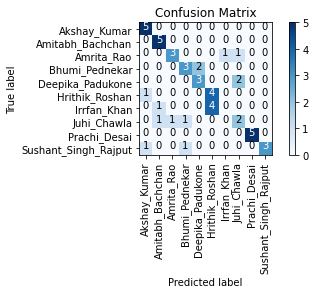

In [23]:
cm_plot_labels = celebs[:]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')